<a href="https://colab.research.google.com/github/Lee-Gunju/Lee-Gunju/blob/master/Leegunju_assign04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#### 1. Plotting the estimated parameters [1pt]

import csv
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

train_data = pd.read_csv('data_train.csv', sep=',')
test_data = pd.read_csv('data_test.csv', sep=',')

#train data
x_train = np.array(train_data.iloc[:, 0])
y_train = np.array(train_data.iloc[:, 1])
z_train = np.array(train_data.iloc[:, 2])
h_train = np.array(train_data.iloc[:, 3])

#test data
x_test = np.array(test_data.iloc[:, 0])
y_test = np.array(test_data.iloc[:, 1])
z_test = np.array(test_data.iloc[:, 2])
h_test = np.array(test_data.iloc[:, 3])

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
z = tf.placeholder(tf.float32)
h = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name = 'weight1')
w2 = tf.Variable(tf.random_normal([1]), name = 'weight2')
w3 = tf.Variable(tf.random_normal([1]), name = 'weight3')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

w1_list = []
w2_list = []
w3_list = []
b_list = []
cost_list_train = []


hypothesis = x * w1 + y * w2 + z * w3 + b

#cost / loss function
cost = tf.reduce_mean(tf.square(hypothesis- h))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.00001)
train = optimizer.minimize(cost)


sess = tf.Session()
sess.run(tf.global_variables_initializer())
epochs = 5001
for step in range(epochs):
    cost_val, hy_val, train_val, w1_val, w2_val, w3_val, b_val = sess.run([cost, hypothesis, train, w1, w2, w3, b],
                                  feed_dict = {x: x_train, y:y_train, z:z_train, h:h_train})
    
    w1_list.append(w1_val)
    w2_list.append(w2_val)
    w3_list.append(w3_val)
    b_list.append(b_val)
    cost_list_train.append(cost_val)

    #f step % 1000 == 0:
    #    print(step, "cost: ", cost_val, 
    #          "\nPrediction: \n", hy_val)


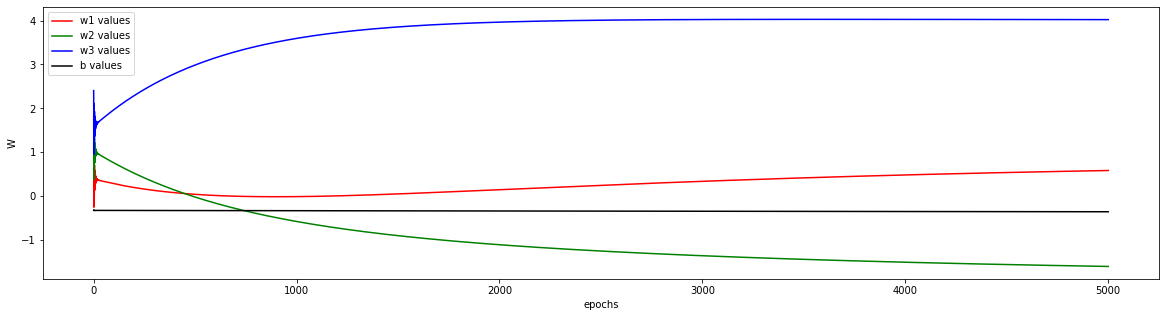

In [234]:
#### 1. Plotting the estimated parameters [1pt]

plt.plot(range(epochs), w1_list, 'r', label = 'w1 values')
plt.plot(range(epochs), w2_list, 'g', label = 'w2 values')
plt.plot(range(epochs), w3_list, 'b', label = 'w3 values')  
plt.plot(range(epochs), b_list, 'k', label = 'b values')    
plt.ylabel('W')
plt.xlabel('epochs')
plt.rcParams["figure.figsize"] = (20,5)
plt.legend()
plt.show()

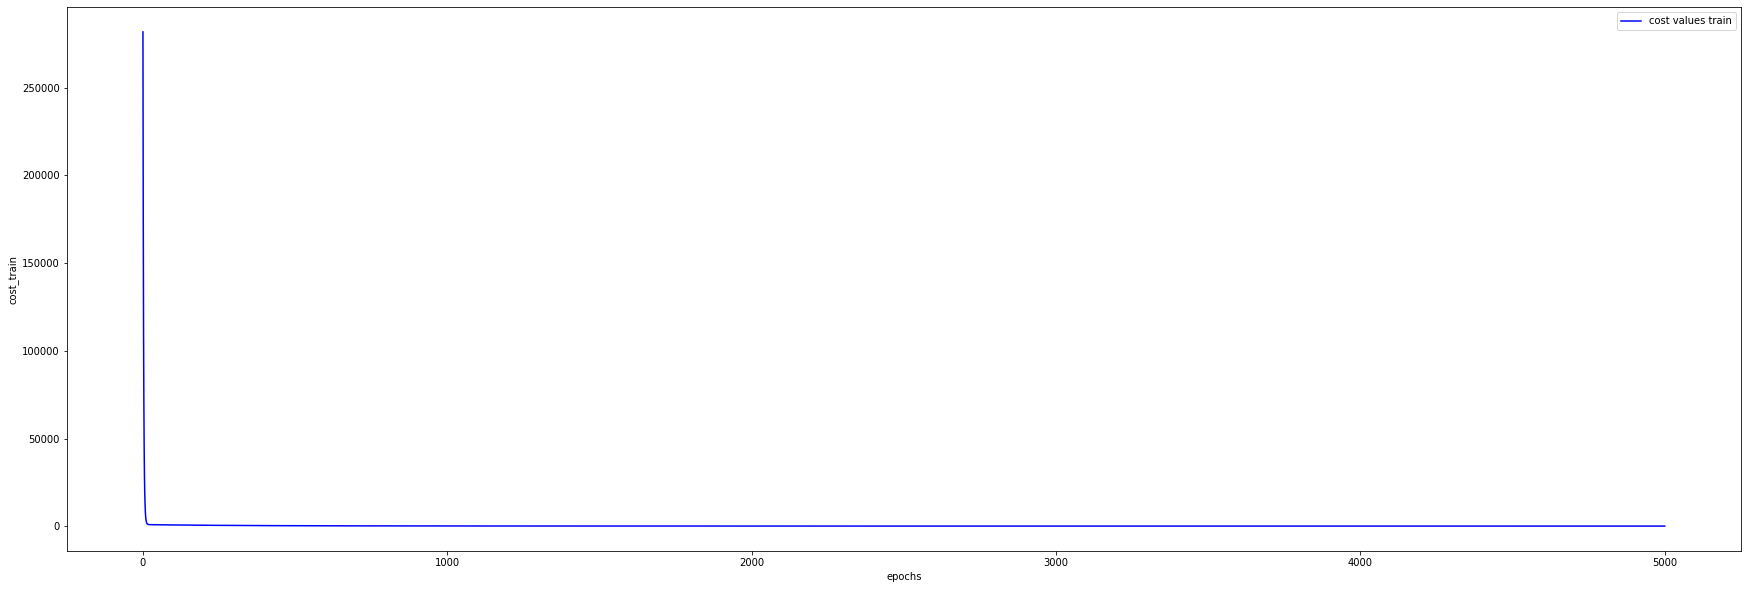

In [241]:
#### 2. Plotting the training error [1pt]



plt.plot(range(epochs), cost_list_train, 'b', label = 'cost values train')
plt.ylabel('cost_train')
plt.xlabel('epochs')
plt.rcParams["figure.figsize"] = (30,5)
plt.legend()
plt.show()

In [0]:
#### 3. Plotting the testing error [1pt]


cost_list_test = []


sess = tf.Session()
sess.run(tf.global_variables_initializer())
epochs = 5001
for step in range(epochs):
    cost_val, hy_val, train_val, w1_val, w2_val, w3_val, b_val = sess.run([cost, hypothesis, train, w1, w2, w3, b],
                                  feed_dict = {x: x_test, y:y_test, z:z_test, h:h_test})
    


    cost_list_test.append(cost_val)

    #if step % 1000 == 0:
    #    print(step, "cost: ", cost_val, 
    #          "\nPrediction: \n", hy_val)
      

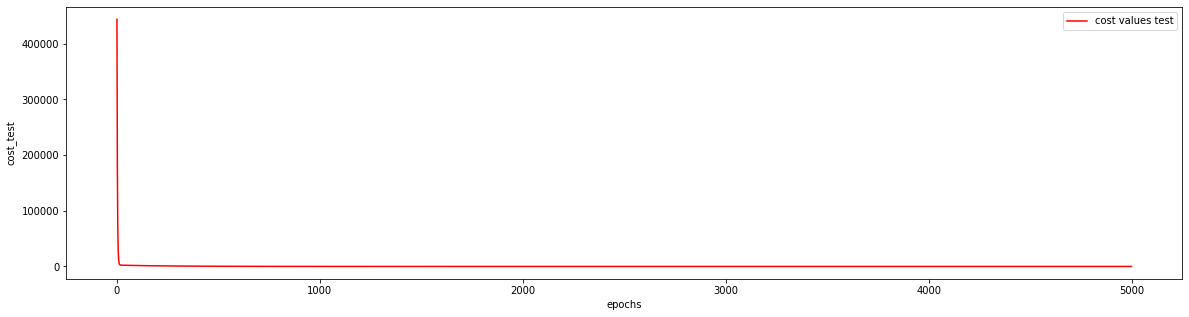

In [237]:
#### 3. Plotting the testing error [1pt]

plt.plot(range(epochs), cost_list_test, 'r', label = 'cost values test')
plt.ylabel('cost_test')
plt.xlabel('epochs')
plt.rcParams["figure.figsize"] = (30,5)
plt.legend()
plt.show()